In [12]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
from lib import *

### Parâmetros do circuito

In [13]:
r1=10 # resistência do resistor 1
r2=10 # resistência do resistor 2
l1=3.5e-4 # indutância da bobina 1
l2=3.5e-4 # indutância da bobina 2
c1=1e-6 # capacitância do capacitor 1
c2=1e-6 # capacitância do capacitor 2
k = 0.5 #fator de acoplamento

w = 1/sqrt(l1*c1) # frequência angular de ressonância
fres = w/(2*pi) # frequência de ressonância
print(f'Frequência de ressonancia: {fres.real:.2f} Hz')

Frequência de ressonancia: 8507.19 Hz


### Cálculo de omega e das reatâncias indutivas

In [14]:
omega = 2*pi*fres.real # frequência angular de ressonância

m = (l1 * l2)**0.5 # indutância mutua

xl1 = omega * l1 * 1j # reatância indutiva da bobina 1
xl2 = omega * l2 * 1j # reatância indutiva da bobina 2
xm = omega * m * 1j # reatância indutiva da indutância mutua

### Função para calcular o modelo de transformador

In [15]:
def CalcularTransformador(v1, rc,freq):
    omega=2*pi*freq
    m=k*sqrt(l1*l2)

    #cálculo das impedâncias de cada componente
    xc1=Xc(c1,omega)
    xc2=Xc(c2,omega)
    xl1=Xl(l1,omega)
    xl2=Xl(l2,omega)

    zeq1=xl1+r1+xc1 #impedância equivalente do circuito 1

    xm=Xl(m,omega) #indutância mutua
    
    Z=np.array([[zeq1, -xm],[-xm, xl2+r2+paralelo([rc,xc2])]]) #matriz de impedâncias
    V=np.array([v1,0]) #vetor de tensões
    I=np.dot(linalg.inv(Z),V) #vetor de correntes
    return I[0], I[1] 

### Calculando e plotando os gráficos de corrente e tensão pela frequência

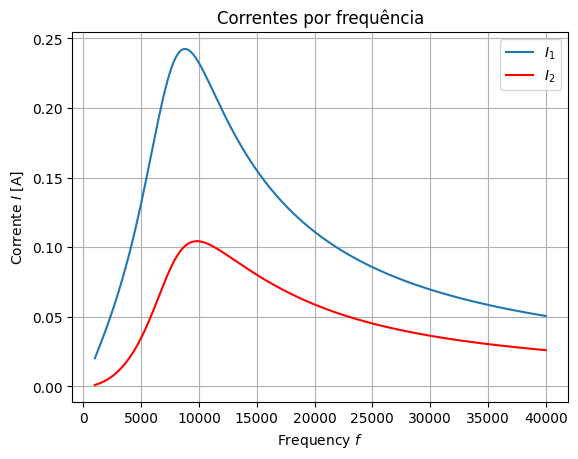

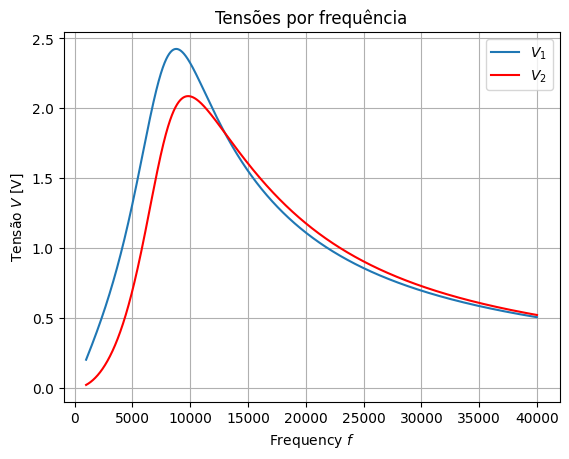

Frequência de maior corrente I1: 8792.98 Hz
Frequência de maior corrente I2: 9826.58 Hz
Frequência de maior tensão V1: 8792.98 Hz
Frequência de maior tensão V2: 9826.58 Hz


In [16]:
F=np.linspace(1e3,4e4,10000)
I1=[]
I2=[]
V1=[]
V2=[]

v1=5*2/pi # tensão de entrada
rc=10 #resistencia da carga

# K inicial fixo

for freq in F:
    m=k*sqrt(l1*l2)
    xm=Xl(m,freq/(2*pi))
    i1, i2 = CalcularTransformador(v1, rc, freq)
    I1.append(np.abs(i1))
    I2.append(np.abs(i2))
    V1.append(np.abs(i1)*r1)
    V2.append(np.abs(i2)*(rc+r2))

plt.plot(F,I1,label="$I_1$") 
plt.plot(F,I2,'r',label="$I_2$")    
plt.title("Correntes por frequência")
plt.legend()
plt.xlabel("Frequency $f$")
plt.ylabel("Corrente $I$ [A]")
plt.grid(True)
plt.show()

plt.plot(F,V1,label="$V_1$")
plt.plot(F,V2,'r',label="$V_2$")
plt.title("Tensões por frequência")
plt.legend()
plt.xlabel("Frequency $f$")
plt.ylabel("Tensão $V$ [V]")
plt.grid(True)
plt.show()

V2,V1=np.array(V2),np.array(V1)

print(f'Frequência de maior corrente I1: {F[np.argmax(I1)]:.2f} Hz')
print(f'Frequência de maior corrente I2: {F[np.argmax(I2)]:.2f} Hz')

print(f'Frequência de maior tensão V1: {F[np.argmax(V1)]:.2f} Hz')
print(f'Frequência de maior tensão V2: {F[np.argmax(V2)]:.2f} Hz')

### Calculando e plotando os gráficos de corrente pelo coeficiente de acoplamento k

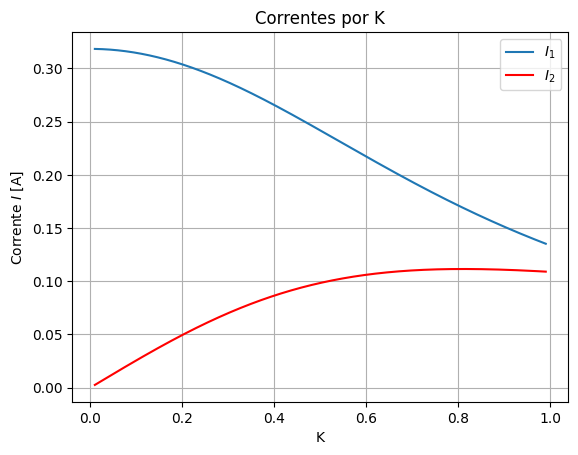

In [17]:
K=np.linspace(0.01,0.99,10000)
I1=[]
I2=[]

for k in K:
    m=k*sqrt(l1*l2)
    xm=Xl(m,freq/(2*pi))
    i1, i2 = CalcularTransformador(v1, rc, fres)
    I1.append(np.abs(i1))
    I2.append(np.abs(i2))
    
plt.plot(K,I1,label="$I_1$") 
plt.plot(K,I2,'r',label="$I_2$")    
plt.legend()
plt.xlabel("K")
plt.ylabel("Corrente $I$ [A]")
plt.title("Correntes por K")
plt.grid(True)
plt.show()


### Calculando e plotando os gráficos da potência e eficiência pela frequência

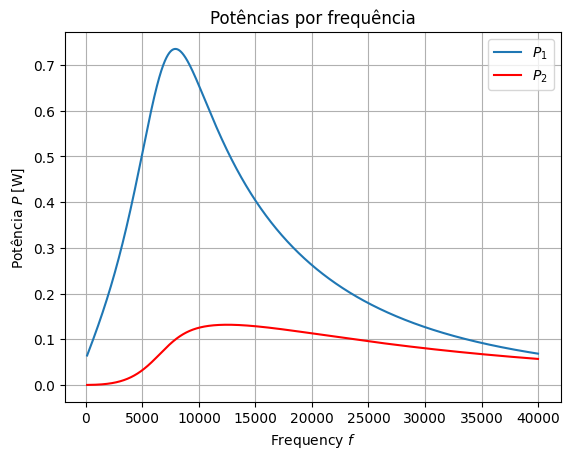

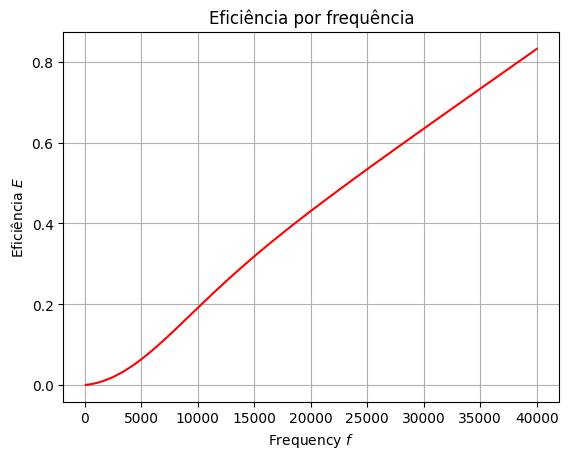

Eficiência na frequência de ressonância 15.107%


In [18]:
F=np.linspace(100,4e4,10000)
P1=[]
P2=[]
RP=[]
v1=5*2/pi 
rc=328
k = 0.5 # K inicial fixo

P1=I1*V1
P2=I2*V2
Eficiencia=P2/P1
Eficiencia=np.array(Eficiencia)

plt.plot(F,P1,label="$P_1$") 
plt.plot(F,P2,'r',label="$P_2$")    
plt.legend()
plt.xlabel("Frequency $f$")
plt.title("Potências por frequência")
plt.ylabel("Potência $P$ [W]")
plt.grid(True)
plt.show()

plt.plot(F,Eficiencia,'r',label="$Eficiência$")
plt.xlabel("Frequency $f$")
plt.title("Eficiência por frequência")
plt.ylabel("Eficiência $E$")
plt.grid(True)
plt.show()

# print(F[2107]) Frequência de ressonância
print(f'Eficiência na frequência de ressonância {Eficiencia[2107]*100 :.3f}%')

In [19]:
v1=5*2/pi
rc=328 #resistencia de carga

i1,i2=CalcularTransformador(v1, rc, fres)
print(f'i1 = {i1:.3f} A\ni2 = {i2:.3f} A')

v2=i2*rc

print(f'v2 = {v2:.3f} V')

i1 = 0.178+0.000j A
i2 = 0.000+0.150j A
v2 = 0.151+49.290j V


### Calculando e plotando os gráficos da potência e tensão pelo coeficiente de acoplamento k

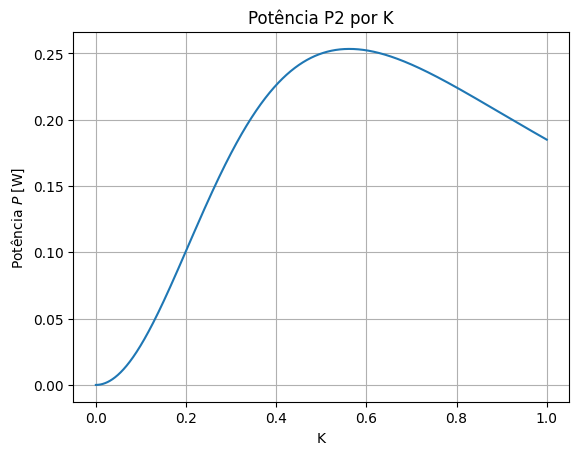

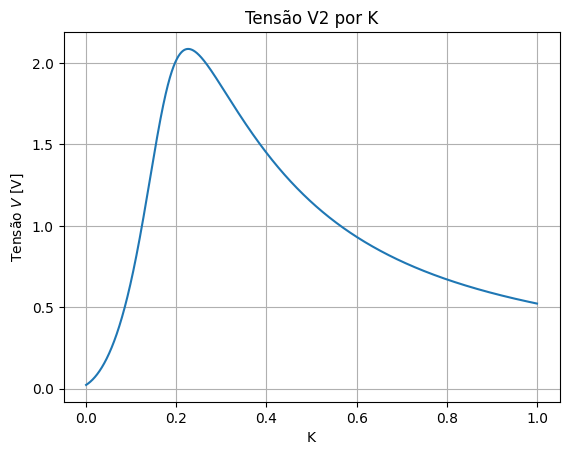

K = [0.22632263]


In [20]:
K=np.linspace(0,1,10000) 
P2=[]

for k in K: 
    m=k*sqrt(l1*l2) 
    xm=Xl(m,omega)
    i1,i2=CalcularTransformador(v1, rc, fres)
    xc2=Xc(c2,omega)
    v2=i2*(xl2+r2+paralelo([rc,xc2]))
    P2.append(np.abs(i2)*np.abs(v2))
    
plt.plot(K,P2)
plt.xlabel("K")
plt.ylabel("Potência $P$ [W]")
plt.title("Potência P2 por K")
plt.grid(True)
plt.show()

plt.plot(K,V2)
plt.xlabel("K")
plt.ylabel("Tensão $V$ [V]")
plt.title("Tensão V2 por K")
plt.grid(True)
plt.show()

ind = np.where(V2 == max(V2))
print(f'K = {K[ind]}') 

### Valores obtidos no experimento

In [21]:
# experimental
d_exp=0.062 #m
V_carga_exp=7.4 #V
resist_exp=328 #ohm

V_primario_exp=9 #V
i_primario_exp=0.25 #A

p_carga=V_carga_exp**2/resist_exp
p_primario=V_primario_exp*i_primario_exp

print(f'Distância entre bobinas: {d_exp:.3f} m')
print(f'Frequência :{8.5e3:.1f} Hz')
print(f'Potência da carga = {p_carga:.3f} W')
print(f'Potência do primário = {p_primario:.3f} W')
print(f'Eficiência = {p_carga/p_primario*100:.3f}%')


Distância entre bobinas: 0.062 m
Frequência :8500.0 Hz
Potência da carga = 0.167 W
Potência do primário = 2.250 W
Eficiência = 7.420%
